In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

In [2]:
data_325 = pd.read_excel("3-数据清洗后325样本数据.xlsx", na_values=np.nan)

In [3]:
data_325_corr = data_325[data_325.columns[2:]].corr()

In [4]:
RON_corr = dict(data_325_corr.iloc[0])

In [5]:
RON_corr = sorted(RON_corr.items(), key=lambda x: x[1], reverse=True)

In [6]:
RON_corr

[('RON损失', 1.0),
 ('S-ZORB.FT_9302.PV', 0.3594070790303029),
 ('S-ZORB.CAL.CANGLIANG.PV', 0.3195417316313435),
 ('S-ZORB.LI_2104.DACA', 0.31951741227729086),
 ('S-ZORB.PDT_2104.PV', 0.3194412459848149),
 ('S-ZORB.FT_1504.TOTALIZERA.PV', 0.3061069287124234),
 ('S-ZORB.TE_5201.DACA', 0.3013085164385599),
 ('S-ZORB.FT_1503.TOTALIZERA.PV', 0.30121588089762213),
 ('S-ZORB.LT_3801.DACA', 0.30021313683017326),
 ('S-ZORB.LC_5001.PV', 0.2958247677443841),
 ('S-ZORB.CAL_H2.PV', 0.2901741749774067),
 ('S-ZORB.AT-0001.DACA.PV', 0.2780548835380038),
 ('S-ZORB.AT-0002.DACA.PV', 0.277238879638677),
 ('S-ZORB.PDI_1102.PV', 0.2760023576785639),
 ('S-ZORB.FC_1102.PV', 0.271922725896741),
 ('S-ZORB.PDI_2102.PV', 0.25692784609321867),
 ('S-ZORB.FC_5001.DACA', 0.2547375900467951),
 ('S-ZORB.PT_1501.PV', 0.2482679651295373),
 ('S-ZORB.TXE_2203A.DACA', 0.24671011532281484),
 ('S-ZORB.TXE_2202A.DACA', 0.24666290171102692),
 ('S-ZORB.PC_3501.DACA', 0.2315053023516191),
 ('S-ZORB.PC_1001A.PV', 0.230475040939306

In [7]:
data_325.head()

,样本编号,时间,RON损失,原料性质：硫含量,原料性质：辛烷值,原料性质：饱和烃,原料性质：烯烃,原料性质：芳烃,原料性质：溴值,原料性质：密度,...,S-ZORB.AT-0011.DACA.PV,S-ZORB.FT_1204.DACA.PV,S-ZORB.LC_5102.PIDA.PV,S-ZORB.TE_1102.DACA.PV,S-ZORB.CAL.LINE.PV,S-ZORB.CAL.CANGLIANG.PV,S-ZORB.CAL.SPEED.PV,S-ZORB.FT_1503.TOTALIZERA.PV,S-ZORB.FT_1504.TOTALIZERA.PV,S-ZORB.PC_1001A.PV
0,1,2020/5/26 8:00:00,1.38,188.0,90.6,53.230000,24.400000,22.370000,61.487143,726.085714,...,0.496243,18.292067,42.015425,425.929515,0.282564,37.804650,3.324945,39063124.5,39608757.0,0.353271
1,2,2020/5/21 8:00:00,1.18,169.0,90.5,52.300000,26.400000,21.300000,61.880000,731.300000,...,0.491385,19.842605,40.903878,421.534365,0.281381,37.876006,3.321169,38810581.5,39389299.0,0.354504
2,3,2020/5/19 8:00:00,1.38,177.0,90.7,52.300000,26.314286,21.385714,61.722857,729.614286,...,0.495483,26.994896,42.103142,425.258420,0.282277,37.907927,3.319569,38693812.0,39312616.5,0.350181
3,4,2020/5/14 8:00:00,1.38,159.0,90.4,52.300000,26.100000,21.600000,61.330000,725.400000,...,0.490180,26.324458,41.970416,424.406195,0.282275,39.177396,3.210211,38410862.5,39120204.5,0.353930
4,5,2020/5/12 8:00:00,1.28,173.0,89.6,52.242857,26.671429,21.085714,61.332857,725.428571,...,0.501194,30.224367,42.900094,428.514740,0.282963,39.508370,3.178832,38283000.0,39045953.5,0.358053


In [8]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression

# Build a classification task using 3 informative features
X, y = data_325[ data_325.columns[3:] ], data_325[ data_325.columns[2] ]

In [9]:
X.drop(['产品性质：硫含量', '产品性质：辛烷值'], axis=1, inplace=True)

In [10]:
X.head()

,原料性质：硫含量,原料性质：辛烷值,原料性质：饱和烃,原料性质：烯烃,原料性质：芳烃,原料性质：溴值,原料性质：密度,待生吸附剂性质：焦炭,待生吸附剂性质：S,再生吸附剂性质：焦炭,...,S-ZORB.AT-0011.DACA.PV,S-ZORB.FT_1204.DACA.PV,S-ZORB.LC_5102.PIDA.PV,S-ZORB.TE_1102.DACA.PV,S-ZORB.CAL.LINE.PV,S-ZORB.CAL.CANGLIANG.PV,S-ZORB.CAL.SPEED.PV,S-ZORB.FT_1503.TOTALIZERA.PV,S-ZORB.FT_1504.TOTALIZERA.PV,S-ZORB.PC_1001A.PV
0,188.0,90.6,53.230000,24.400000,22.370000,61.487143,726.085714,2.32,7.30,1.84,...,0.496243,18.292067,42.015425,425.929515,0.282564,37.804650,3.324945,39063124.5,39608757.0,0.353271
1,169.0,90.5,52.300000,26.400000,21.300000,61.880000,731.300000,2.37,7.34,0.55,...,0.491385,19.842605,40.903878,421.534365,0.281381,37.876006,3.321169,38810581.5,39389299.0,0.354504
2,177.0,90.7,52.300000,26.314286,21.385714,61.722857,729.614286,2.43,7.27,1.89,...,0.495483,26.994896,42.103142,425.258420,0.282277,37.907927,3.319569,38693812.0,39312616.5,0.350181
3,159.0,90.4,52.300000,26.100000,21.600000,61.330000,725.400000,3.08,7.35,0.98,...,0.490180,26.324458,41.970416,424.406195,0.282275,39.177396,3.210211,38410862.5,39120204.5,0.353930
4,173.0,89.6,52.242857,26.671429,21.085714,61.332857,725.428571,2.45,6.58,0.83,...,0.501194,30.224367,42.900094,428.514740,0.282963,39.508370,3.178832,38283000.0,39045953.5,0.358053


In [11]:
X.shape

(325, 198)

In [12]:
X.columns[:15]

Index(['原料性质：硫含量', '原料性质：辛烷值', '原料性质：饱和烃', '原料性质：烯烃', '原料性质：芳烃', '原料性质：溴值',
       '原料性质：密度', '待生吸附剂性质：焦炭', '待生吸附剂性质：S', '再生吸附剂性质：焦炭', '再生吸附剂性质：S',
       'S-ZORB.CAL_H2.PV', 'S-ZORB.PDI_2102.PV', 'S-ZORB.PT_2801.PV',
       'S-ZORB.FC_2801.PV'],
      dtype='object')

In [13]:
y.head()

0    1.38
1    1.18
2    1.38
3    1.38
4    1.28
Name: RON损失, dtype: float64

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [16]:
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error #平方绝对误差
from sklearn.metrics import r2_score#R square

In [18]:
feature_list = []
score_list = []
for i in range(15, 31):
    # Create the RFE object and compute a cross-validated score.
    RFR = RandomForestRegressor(random_state=111)
    # The "accuracy" scoring is proportional to the number of correct
    rfe = RFE(estimator=RFR, step=1, n_features_to_select=i)
    rfe.fit(x_train, y_train)
    y_predict = rfe.predict(x_test)
    print(rfe.score(x_test,y_test))
    score_list.append(rfe.score(x_test,y_test))
    # 输出选择特征
    print(X.columns[ rfe.get_support() ])
    feature_list.append(x_train.columns[ rfe.get_support() ])
    # print("Optimal number of features : %d" % rfe.n_features_)
    mse_score = MSE(y_test, y_predict)
    rmse_score = np.sqrt(mse_score)
    mae_score = mean_absolute_error(y_test, y_predict)
    rr_score = r2_score(y_test, y_predict)
    print(mse_score, rmse_score, mae_score, rr_score)
    # # Plot number of features VS. cross-validation scores
#     plt.figure()
#     plt.xlabel("Number of features selected")
#     plt.ylabel("Cross validation score (nb of correct classifications)")
#     plt.plot(range(1, len(rfe.grid_scores_) + 1), rfe.grid_scores_)
#     plt.show()

-0.24324307340338058
Index(['原料性质：饱和烃', '再生吸附剂性质：S', 'S-ZORB.TE_2103.PV', 'S-ZORB.TE_5202.PV',
       'S-ZORB.FT_9302.PV', 'S-ZORB.PT_9402.PV', 'S-ZORB.PC_1603.PV',
       'S-ZORB.TE_1201.PV', 'S-ZORB.TC_2801.PV', 'S-ZORB.TE_1106.DACA',
       'S-ZORB.LI_9102.DACA', 'S-ZORB.TE_6002.DACA', 'S-ZORB.LT_9101.DACA',
       'S-ZORB.PDT_1003.DACA', 'S-ZORB.PC_1001A.PV'],
      dtype='object')
0.05434221428571397 0.23311416577658675 0.1675612244897948 -0.24324307340338058
-0.06226917994727144
Index(['原料性质：饱和烃', '再生吸附剂性质：S', 'S-ZORB.TE_2103.PV', 'S-ZORB.TE_5202.PV',
       'S-ZORB.FT_9302.PV', 'S-ZORB.PT_9402.PV', 'S-ZORB.PC_1603.PV',
       'S-ZORB.TE_1201.PV', 'S-ZORB.TC_2801.PV', 'S-ZORB.TE_1106.DACA',
       'S-ZORB.LI_9102.DACA', 'S-ZORB.LI_2104.DACA', 'S-ZORB.TE_6002.DACA',
       'S-ZORB.LT_9101.DACA', 'S-ZORB.PDT_1003.DACA', 'S-ZORB.PC_1001A.PV'],
      dtype='object')
0.04643183673469346 0.21548047877868998 0.15430612244897846 -0.062269179947271436
-0.08388472081246245
Index(['原料性质：饱和烃

-0.05118267100818685
Index(['原料性质：饱和烃', '原料性质：溴值', '原料性质：密度', '再生吸附剂性质：S', 'S-ZORB.TE_2103.PV',
       'S-ZORB.TE_5202.PV', 'S-ZORB.FT_9302.PV', 'S-ZORB.PT_9402.PV',
       'S-ZORB.PDI_1102.PV', 'S-ZORB.PC_1603.PV', 'S-ZORB.TE_1201.PV',
       'S-ZORB.TC_2801.PV', 'S-ZORB.PT_1103.DACA', 'S-ZORB.TE_1106.DACA',
       'S-ZORB.LI_9102.DACA', 'S-ZORB.TE_9002.DACA', 'S-ZORB.LT_3801.DACA',
       'S-ZORB.FT_3303.DACA', 'S-ZORB.LT_2101.DACA', 'S-ZORB.PDT_2704.DACA',
       'S-ZORB.PDC_2702.DACA', 'S-ZORB.LI_2104.DACA', 'S-ZORB.TE_6002.DACA',
       'S-ZORB.LT_9101.DACA', 'S-ZORB.PDT_1003.DACA', 'S-ZORB.TE_7504B.DACA',
       'S-ZORB.AT-0008.DACA.PV', 'S-ZORB.AT-0009.DACA.PV',
       'S-ZORB.PC_1001A.PV'],
      dtype='object')
0.04594724489795878 0.21435308464764108 0.15863265306122373 -0.05118267100818685
-0.09673914156868002
Index(['原料性质：饱和烃', '原料性质：溴值', '原料性质：密度', '再生吸附剂性质：S', 'S-ZORB.PDI_2102.PV',
       'S-ZORB.TE_2103.PV', 'S-ZORB.TE_5202.PV', 'S-ZORB.FT_9302.PV',
       'S-ZORB.PT_9402

In [21]:
score_df = pd.DataFrame(score_list)

In [23]:
score_df

,0
0,-0.243243
1,-0.062269
2,-0.083885
3,-0.043538
4,-0.046850
5,0.054098
6,0.010581
7,-0.008669
8,-0.092365
9,0.005430


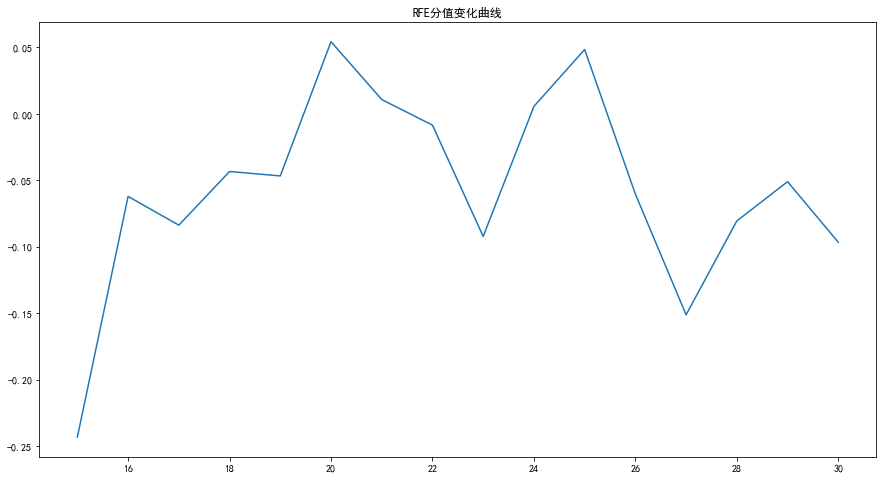

In [20]:
plt.figure(figsize=(15, 8))
plt.title("RFE分值变化曲线")
plt.plot(range(15, 31), score_list)
plt.show()

In [21]:
feature_list1 = []
for i in range(30, 31):
    # Create the RFE object and compute a cross-validated score.
    RFR = RandomForestRegressor(random_state=111)
    # The "accuracy" scoring is proportional to the number of correct
    rfe = RFE(estimator=RFR, step=1, n_features_to_select=i)
    rfe.fit_transform(X, y.astype(str))
    
    # 输出选择特征
    print(X.columns[ rfe.get_support() ])
    feature_list1.append(X.columns[ rfe.get_support() ])
    # print("Optimal number of features : %d" % rfe.n_features_)
    
    # # Plot number of features VS. cross-validation scores
#     plt.figure()
#     plt.xlabel("Number of features selected")
#     plt.ylabel("Cross validation score (nb of correct classifications)")
#     plt.plot(range(1, len(rfe.grid_scores_) + 1), rfe.grid_scores_)
#     plt.show()

Index(['原料性质：辛烷值', '原料性质：饱和烃', '待生吸附剂性质：焦炭', '再生吸附剂性质：S', 'S-ZORB.PC_5101.PV',
       'S-ZORB.TC_5005.PV', 'S-ZORB.TE_5102.PV', 'S-ZORB.TE_5202.PV',
       'S-ZORB.TE_9301.PV', 'S-ZORB.PT_9402.PV', 'S-ZORB.PT_9401.PV',
       'S-ZORB.PDI_1102.PV', 'S-ZORB.TE_1601.PV', 'S-ZORB.TE_1201.PV',
       'S-ZORB.LI_9102.DACA', 'S-ZORB.LT_3801.DACA', 'S-ZORB.PT_2502.DACA',
       'S-ZORB.TE_5201.DACA', 'S-ZORB.TE_5101.DACA', 'S-ZORB.TE_6002.DACA',
       'S-ZORB.LT_9101.DACA', 'S-ZORB.PDT_1003.DACA', 'S-ZORB.PDT_3502.DACA',
       'S-ZORB.PDT_3002.DACA', 'S-ZORB.PT_2901.DACA', 'S-ZORB.FC_5001.DACA',
       'S-ZORB.AT-0004.DACA.PV', 'S-ZORB.LC_5102.PIDA.PV',
       'S-ZORB.CAL.SPEED.PV', 'S-ZORB.PC_1001A.PV'],
      dtype='object')


In [ ]:
# def trainandTest(X_train, y_train, X_test):
#     # XGBoost训练过程
#     model = xgb.XGBRegressor(max_depth=5, learning_rate=0.1, n_estimators=160, silent=False, objective='reg:gamma')
#     model.fit(X_train, y_train)

#     # 对测试集进行预测
#     ans = model.predict(X_test)

#     ans_len = len(ans)
#     id_list = np.arange(10441, 17441)
#     data_arr = []
#     for row in range(0, ans_len):
#         data_arr.append([int(id_list[row]), ans[row]])
#     np_data = np.array(data_arr)

#     # 写入文件
#     pd_data = pd.DataFrame(np_data, columns=['id', 'y'])
#     # print(pd_data)
#     pd_data.to_csv('submit.csv', index=None)

#     # 显示重要特征
#     # plot_importance(model)
#     # plt.show()

In [93]:
from xgboost import XGBRegressor as XGBR
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.linear_model import LinearRegression as LinearR
from sklearn.datasets import load_boston
from sklearn.model_selection import KFold, cross_val_score as CVS, train_test_split as TTS
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error #平方绝对误差
from sklearn.metrics import r2_score#R square
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor

In [95]:
for i in range(len(feature_list)):
    #Xtrain,Xtest,Ytrain,Ytest = TTS(X[ feature_list[i] ], y, test_size=0.2, random_state=111)
    Xtrain,Xtest,Ytrain,Ytest = TTS(X, y, test_size=0.3, random_state=111)
    forest_reg = RandomForestRegressor()
    forest_reg.fit(Xtrain, Ytrain)
    y_predict = forest_reg.predict(Xtest)
    mse_score = MSE(Ytest,y_predict)
    rmse_score = np.sqrt(mse_score)
    mae_score = mean_absolute_error(Ytest,y_predict)
    rr_score = r2_score(Ytest,y_predict)
    print(mse_score, rmse_score, mae_score, rr_score)

0.027904081632652657 0.167045148485829 0.12748979591836668 -0.001722423653408356
0.02693341836734646 0.16411404073797725 0.12468367346938745 0.03312320113633771
0.02943004081632596 0.17155186042805237 0.13646938775510106 -0.05650249317831535
0.030087622448979282 0.17345784055204677 0.13694897959183613 -0.08010887003325706
0.03411934693877516 0.18471423047176186 0.14624489795918322 -0.22484285126900483
0.03090241836734654 0.1757908369834632 0.14196938775510143 -0.10935904758343495
0.02902780612244859 0.17037548568514366 0.1377244897959177 -0.042062759316698894
0.027417030612244493 0.16558088842690902 0.12698979591836712 0.015762112660276273
0.03166232653061172 0.17793910905310198 0.13763265306122366 -0.13663882181435794
0.028067704081632363 0.1675341877994828 0.1284795918367345 -0.007596269577234027
0.02785779591836708 0.16690654845861225 0.12691836734693906 -6.082308525257041e-05


In [92]:
for i in range(len(feature_list)):
    Xtrain,Xtest,Ytrain,Ytest = TTS(X[ feature_list[i] ], y, test_size=0.2, random_state=111)
    tree_reg = DecisionTreeRegressor()
    tree_reg.fit(Xtrain,Ytrain)
    y_predict = tree_reg.predict(Xtest)
    mse_score = MSE(Ytest,y_predict)
    rmse_score = np.sqrt(mse_score)
    mae_score = mean_absolute_error(Ytest,y_predict)
    rr_score = r2_score(Ytest,y_predict)
    print(mse_score, rmse_score, mae_score, rr_score)

0.08188153846153896 0.28614950368913616 0.23615384615384644 -2.146671772416953
0.05621999999999991 0.23710757052443499 0.19400000000000092 -1.1605100535376027
0.07634923076923167 0.27631364564427807 0.22076923076923294 -1.934067603286869
0.06997846153846175 0.26453442410858696 0.20676923076923123 -1.6892417233180597
0.06337384615384564 0.2517416257869279 0.2023076923076917 -1.4354292377575435
0.06520615384615461 0.255354956572522 0.20061538461538514 -1.5058440223610257
0.05880769230769266 0.24250297381205999 0.19676923076923192 -1.2599539390984726
0.06743692307692309 0.259686201167723 0.20000000000000076 -1.5915715099134569
0.07094153846153799 0.266348528176031 0.2113846153846156 -1.7262523489786123
0.08698923076923103 0.29493936795421366 0.231846153846156 -2.342958157709472
0.0777661538461537 0.2788658348492222 0.21907692307692433 -1.9885193384839428


In [87]:
for i in range(len(feature_list)):
    Xtrain,Xtest,Ytrain,Ytest = TTS(X[ feature_list[i] ], y, test_size=0.3, random_state=111)
    model = MLPRegressor(hidden_layer_sizes=(10,), random_state=111,learning_rate_init=0.1)  # BP神经网络回归模型
    model.fit(Xtrain,Ytrain)  # 训练模型
    y_predict = model.predict(Xtest)  # 模型预测
#     np.abs(data_te.iloc[:,2]-pre).mean()  # 模型评价
    mse_score = MSE(Ytest,y_predict)
    rmse_score = np.sqrt(mse_score)
    mae_score = mean_absolute_error(Ytest,y_predict)
    rr_score = r2_score(Ytest,y_predict)
    print(mse_score, rmse_score, mae_score, rr_score)

0.9993392353617112 0.9996695630865787 0.7602443724882055 -34.87505706430637
0.6709943801018955 0.8191424663035701 0.8019337077426353 -23.087878094040327
3.8097560965798376 1.9518596508406636 1.5115706717131967 -135.7655872296669
0.37785666159390063 0.6147004649371112 0.2845358198660549 -12.564592299733953
0.09155774321474405 0.30258510078115886 0.22431979837587265 -2.286811071036529
3.5809982778604157 1.892352577576498 1.1017845952297536 -127.5534611466806
1.8229328538983423 1.3501603067407746 1.2184206692522714 -64.44106129719916
1.695683385254761 1.3021840827067275 1.1399891093204078 -59.872960909007354
5.932253390525592 2.4356217667210958 1.8410141729822496 -211.9606457691019
0.6799430522355047 0.8245865947464248 0.8075190094426147 -23.409124485739138
16.140831529212004 4.017565373358846 2.6057529662681067 -578.4361230761118


In [85]:
for i in range(len(feature_list)):
    Xtrain,Xtest,Ytrain,Ytest = TTS(X[ feature_list[i] ], y, test_size=0.3, random_state=111)
    #Xtrain,Xtest,Ytrain,Ytest = TTS(X, y, test_size=0.3, random_state=111)
    reg = XGBR(max_depth=5, learning_rate=0.1, n_estimators=160, objective='reg:gamma').fit(Xtrain,Ytrain)
    
    
    y_predict = reg.predict(Xtest)
    
    

    #调用
    mse_score = MSE(Ytest,y_predict)
    rmse_score = np.sqrt(mse_score)
    mae_score = mean_absolute_error(Ytest,y_predict)
    rr_score = r2_score(Ytest,y_predict)
    print(mse_score, rmse_score, mae_score, rr_score)

0.03392416071092257 0.18418512619351915 0.14371094173314616 -0.21783590426382315
0.035657715382477494 0.1888325061594997 0.14714497140475657 -0.28006839806120487
0.03577279609795498 0.18913697707734198 0.15027796353612619 -0.2841996550845136
0.03338479233979752 0.18271505778068078 0.1412256585821813 -0.19847323900652492
0.03418152496988088 0.18488246258063765 0.14636071494647457 -0.22707496658593884
0.035275657726586127 0.18781815068460803 0.14848226437763232 -0.26635299520103684
0.03492883570216204 0.18689257797505507 0.14850032404977376 -0.25390250844228524
0.04043916161023206 0.20109490697238472 0.16095001648883386 -0.4517164733101673
0.03982875798128419 0.19957143578499453 0.15973009418468023 -0.429803729122916
0.03954296975409132 0.19885414190831258 0.15600477238090626 -0.4195442810835919
0.036788037366288995 0.19180207862869733 0.14942860705511846 -0.3206455756955846


In [59]:




data_x, data_y = data_325[ X.columns[ rfe.get_support() ] ], y